# MOVIELEN DATASET ANALYSIS AND MOVIE RECOMMENDATION USING CORRELATION

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
col_names = ["user_id","item_id","ratings","timestamp"]
df = pd.read_csv("Desktop/ml-100k/u.data",sep = '\t',names = col_names)

In [3]:
df.head()

,user_id,item_id,ratings,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [4]:
df.shape

(100000, 4)

In [5]:
df['user_id'].nunique()#unique ids

943

In [6]:
df.item_id.nunique()

1682

In [7]:
m_titles = pd.read_csv("Desktop/ml-100k/u.item",sep = '\|',header = None)

In [8]:
m_titles.shape

(1682, 24)

In [9]:
m_names = m_titles[[0,1]]

In [10]:
m_names.columns = ['item_id','titles']
m_names

,item_id,titles
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


In [11]:
df = pd.merge(df,m_names,on = "item_id")

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

In [13]:
df

,user_id,item_id,ratings,timestamp,titles
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)
...,...,...,...,...,...
99995,840,1674,4,891211682,Mamma Roma (1962)
99996,655,1640,3,888474646,"Eighth Day, The (1996)"
99997,655,1637,3,888984255,Girls Town (1996)
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."


In [14]:
avg_rating_per_movie = df.groupby('titles').mean()
avg_rating_per_movie

,user_id,item_id,ratings,timestamp
titles,,,,
'Til There Was You (1997),383.777778,1300.0,2.333333,8.861152e+08
1-900 (1994),477.000000,1353.0,2.600000,8.797260e+08
101 Dalmatians (1996),450.330275,225.0,2.908257,8.829281e+08
12 Angry Men (1957),453.552000,178.0,4.344000,8.828963e+08
187 (1997),517.097561,330.0,3.024390,8.850084e+08
...,...,...,...,...
Young Guns II (1990),504.068182,1188.0,2.772727,8.821855e+08
"Young Poisoner's Handbook, The (1995)",452.487805,547.0,3.341463,8.821438e+08
Zeus and Roxanne (1997),532.833333,1164.0,2.166667,8.775338e+08


In [15]:
avg_rating_per_movie.drop(['user_id','item_id','timestamp'], axis = 1,inplace = True)

In [16]:
avg_rating_per_movie.sort_values('ratings',axis=0,ascending = False)

,ratings
titles,
They Made Me a Criminal (1939),5.0
Marlene Dietrich: Shadow and Light (1996),5.0
"Saint of Fort Washington, The (1993)",5.0
Someone Else's America (1995),5.0
Star Kid (1997),5.0
...,...
"Eye of Vichy, The (Oeil de Vichy, L') (1993)",1.0
King of New York (1990),1.0
Touki Bouki (Journey of the Hyena) (1973),1.0


In [17]:
avg_rating_per_movie

,ratings
titles,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390
...,...
Young Guns II (1990),2.772727
"Young Poisoner's Handbook, The (1995)",3.341463
Zeus and Roxanne (1997),2.166667


In [18]:
cd = pd.DataFrame(df.groupby('titles').count()["ratings"])
cd

,ratings
titles,
'Til There Was You (1997),9
1-900 (1994),5
101 Dalmatians (1996),109
12 Angry Men (1957),125
187 (1997),41
...,...
Young Guns II (1990),44
"Young Poisoner's Handbook, The (1995)",41
Zeus and Roxanne (1997),6


In [19]:
avg_rating_per_movie = pd.concat([avg_rating_per_movie,cd],axis = 1)
avg_rating_per_movie

,ratings,ratings
titles,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


In [20]:
avg_rating_per_movie.columns = ['avg_ratings','num_people']

In [21]:
avg_rating_per_movie.sort_values('avg_ratings',ascending = False)

,avg_ratings,num_people
titles,,
They Made Me a Criminal (1939),5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3
...,...,...
"Eye of Vichy, The (Oeil de Vichy, L') (1993)",1.0,1
King of New York (1990),1.0,1
Touki Bouki (Journey of the Hyena) (1973),1.0,1


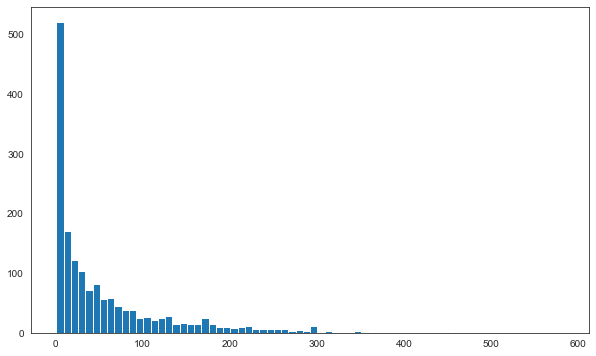

In [22]:
plt.figure(figsize=(10,6))
plt.hist(avg_rating_per_movie['num_people'],bins=70)
plt.show()

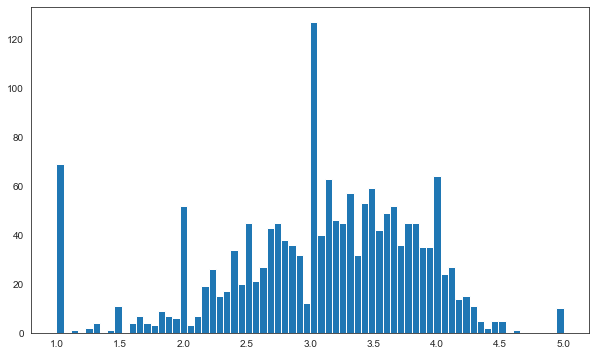

In [23]:
plt.figure(figsize=(10,6))
plt.hist(avg_rating_per_movie['avg_ratings'],bins=70)
plt.show()

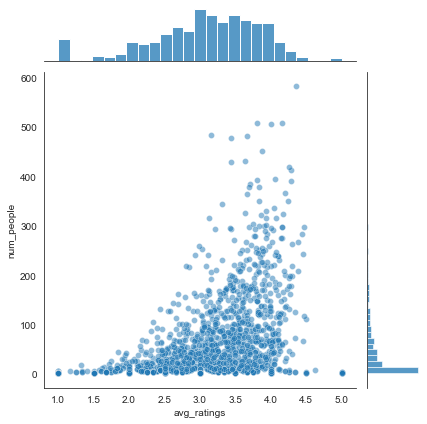

In [24]:
sns.jointplot(x='avg_ratings',y='num_people',data = avg_rating_per_movie,alpha = 0.5)

In [25]:
df.head()

,user_id,item_id,ratings,timestamp,titles
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [26]:
moviemat = df.pivot_table(index = "user_id",columns = "titles" , values = 'ratings')
moviemat

titles,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
starwars_user_ratings = moviemat['Star Wars (1977)']
starwars_user_ratings.head()

user_id
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
Name: Star Wars (1977), dtype: float64

In [28]:
sim_to_star_wars = pd.DataFrame(moviemat.corrwith(starwars_user_ratings),columns = ["Correlation"])
sim_to_star_wars

,Correlation
titles,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
...,...
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374
Zeus and Roxanne (1997),0.818182


In [29]:
sim_to_star_wars.dropna(inplace = True)
sim_to_star_wars.sort_values('Correlation',ascending = False,inplace = True)
sim_to_star_wars.head(5)

,Correlation
titles,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0


In [30]:
sim_to_star_wars = sim_to_star_wars.join(avg_rating_per_movie['num_people'])
sim_to_star_wars

,Correlation,num_people
titles,,
Hollow Reed (1996),1.0,6
Commandments (1997),1.0,3
Cosi (1996),1.0,4
No Escape (1994),1.0,5
Stripes (1981),1.0,5
...,...,...
Roseanna's Grave (For Roseanna) (1997),-1.0,5
For Ever Mozart (1996),-1.0,3
American Dream (1990),-1.0,2


In [31]:
sim_to_star_wars[sim_to_star_wars['num_people']>100].sort_values('Correlation',ascending = False)

,Correlation,num_people
titles,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
...,...,...
"Edge, The (1997)",-0.127167,113
As Good As It Gets (1997),-0.130466,112
Crash (1996),-0.148507,128


In [32]:
def predict(movie_name):
    movie_user_ratings = moviemat[movie_name]
    sim_to_movie = pd.DataFrame(moviemat.corrwith(movie_user_ratings),columns = ["Correlation"])
    sim_to_movie.dropna(inplace = True)
    sim_to_movie = sim_to_movie.join(avg_rating_per_movie['num_people'])
    sim_to_movie = sim_to_movie[sim_to_movie['num_people']>100]
    sim_to_movie.sort_values('Correlation',ascending = False,inplace=True)
    return sim_to_movie[sim_to_movie['Correlation']!=1.0]

In [33]:
movie_name = input("Enter movie name you liked most ex - Movie Name YEAR Released : ")
d = predict(movie_name)
pd.DataFrame(d.index).head(20)

Enter movie name you liked most ex - Movie Name YEAR Released : Edge, The (1997)


,titles
0,"Philadelphia Story, The (1940)"
1,Jungle2Jungle (1997)
2,Ace Ventura: Pet Detective (1994)
3,This Is Spinal Tap (1984)
4,Ed Wood (1994)
5,What's Eating Gilbert Grape (1993)
6,Volcano (1997)
7,Happy Gilmore (1996)
8,"Close Shave, A (1995)"
9,Michael (1996)
